## 1.1
Спрогнозировать значение UDP Throughput (y) для сетевого устройства №3, имеющего параметры: 

	1. Тактовая частота процессора: 2 000 ГГц. (X)
	2. Утилизация процессора: 40%. (X)
	3. Температура процессора: 54 °С. (X)


In [16]:
# Импорт библиотек

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier


from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
# Считываем и смотрим на наш файл.

df = pd.read_excel('test_task.xlsx')
df

,Номер замера,Сетевое устройство,"Тактовая частота ЦП, ГГц","UDP Throughput, Мбит/с","Утилизация ЦП, %","Температура ЦП, °С"
0,1,1,1500,600,50,38
1,2,1,1500,650,55,45
2,3,1,1500,700,60,52
3,4,1,1500,750,65,60
4,5,1,1500,900,70,67
5,6,2,2600,750,35,30
6,7,2,2600,800,40,31
7,8,2,2600,850,45,32
8,9,2,2600,900,50,33
9,10,2,2600,600,30,28


In [3]:
# Разбиваем данные на X и y и стандартизируем.

from sklearn.preprocessing import StandardScaler

X = df.loc[:,["Тактовая частота ЦП, ГГц", "Утилизация ЦП, %", "Температура ЦП, °С"]]
y = df.loc[:,"UDP Throughput, Мбит/с"]
prd = [[2000,40,54]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# Разбиваем данные на тренировочные и тестирующие.

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=0)
y_train.values.reshape(-1,1)
y_test.values.reshape(-1,1)


array([[700],
       [900]], dtype=int64)

In [5]:
# Обучаем модели

clf = RandomForestRegressor(max_depth=15,n_estimators=10000, random_state=2).fit(X_train,y_train.values.ravel())
rfc = RandomForestClassifier().fit(X_train,y_train.values.ravel())
cat = CatBoostRegressor().fit(X_train,y_train,verbose=False, plot=True)
catClas = CatBoostClassifier(max_depth=15,n_estimators=10000,random_state=2).fit(X_train, y_train)
svm = SVC(kernel='linear').fit(X_train,y_train.values.ravel())


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.008839
0:	learn: 1.7901121	total: 583us	remaining: 5.83s
1:	learn: 1.7882075	total: 1.2ms	remaining: 6s
2:	learn: 1.7865652	total: 1.76ms	remaining: 5.88s
3:	learn: 1.7857665	total: 2.14ms	remaining: 5.36s
4:	learn: 1.7846081	total: 2.6ms	remaining: 5.2s
5:	learn: 1.7834510	total: 3.02ms	remaining: 5.03s
6:	learn: 1.7816963	total: 3.55ms	remaining: 5.07s
7:	learn: 1.7799232	total: 4.09ms	remaining: 5.11s
8:	learn: 1.7780325	total: 4.66ms	remaining: 5.17s
9:	learn: 1.7764033	total: 5.2ms	remaining: 5.19s
10:	learn: 1.7752550	total: 5.6ms	remaining: 5.08s
11:	learn: 1.7730868	total: 6.62ms	remaining: 5.51s
12:	learn: 1.7718215	total: 7.1ms	remaining: 5.46s
13:	learn: 1.7706777	total: 7.5ms	remaining: 5.35s
14:	learn: 1.7690559	total: 7.99ms	remaining: 5.32s
15:	learn: 1.7679159	total: 8.38ms	remaining: 5.23s
16:	learn: 1.7674820	total: 8.74ms	remaining: 5.13s
17:	learn: 1.7660836	total: 9.21ms	remaining: 5.11s
18:	learn: 1.7643250	total: 9.82ms	remaining: 5.16s
19:

261:	learn: 1.4479727	total: 133ms	remaining: 4.95s
262:	learn: 1.4471644	total: 134ms	remaining: 4.95s
263:	learn: 1.4456305	total: 134ms	remaining: 4.95s
264:	learn: 1.4442946	total: 135ms	remaining: 4.95s
265:	learn: 1.4427539	total: 136ms	remaining: 4.96s
266:	learn: 1.4412665	total: 136ms	remaining: 4.96s
267:	learn: 1.4396421	total: 137ms	remaining: 4.97s
268:	learn: 1.4383985	total: 137ms	remaining: 4.97s
269:	learn: 1.4370272	total: 138ms	remaining: 4.97s
270:	learn: 1.4362210	total: 138ms	remaining: 4.96s
271:	learn: 1.4347565	total: 139ms	remaining: 4.96s
272:	learn: 1.4337036	total: 139ms	remaining: 4.96s
273:	learn: 1.4323346	total: 140ms	remaining: 4.96s
274:	learn: 1.4318579	total: 140ms	remaining: 4.96s
275:	learn: 1.4310601	total: 141ms	remaining: 4.95s
276:	learn: 1.4295444	total: 141ms	remaining: 4.96s
277:	learn: 1.4287516	total: 142ms	remaining: 4.96s
278:	learn: 1.4279604	total: 142ms	remaining: 4.95s
279:	learn: 1.4269068	total: 143ms	remaining: 4.95s
280:	learn: 

484:	learn: 1.1642948	total: 281ms	remaining: 5.51s
485:	learn: 1.1632174	total: 282ms	remaining: 5.51s
486:	learn: 1.1618003	total: 283ms	remaining: 5.52s
487:	learn: 1.1602532	total: 284ms	remaining: 5.54s
488:	learn: 1.1588385	total: 285ms	remaining: 5.54s
489:	learn: 1.1574275	total: 286ms	remaining: 5.55s
490:	learn: 1.1560101	total: 287ms	remaining: 5.56s
491:	learn: 1.1549493	total: 288ms	remaining: 5.56s
492:	learn: 1.1534123	total: 289ms	remaining: 5.57s
493:	learn: 1.1521457	total: 290ms	remaining: 5.57s
494:	learn: 1.1512101	total: 290ms	remaining: 5.57s
495:	learn: 1.1501324	total: 291ms	remaining: 5.57s
496:	learn: 1.1490713	total: 291ms	remaining: 5.57s
497:	learn: 1.1478077	total: 292ms	remaining: 5.57s
498:	learn: 1.1466122	total: 293ms	remaining: 5.57s
499:	learn: 1.1458099	total: 293ms	remaining: 5.57s
500:	learn: 1.1445352	total: 294ms	remaining: 5.57s
501:	learn: 1.1430135	total: 295ms	remaining: 5.58s
502:	learn: 1.1419618	total: 296ms	remaining: 5.58s
503:	learn: 

652:	learn: 0.9615815	total: 436ms	remaining: 6.24s
653:	learn: 0.9604407	total: 437ms	remaining: 6.24s
654:	learn: 0.9593160	total: 438ms	remaining: 6.24s
655:	learn: 0.9581932	total: 439ms	remaining: 6.25s
656:	learn: 0.9569563	total: 440ms	remaining: 6.26s
657:	learn: 0.9557778	total: 441ms	remaining: 6.26s
658:	learn: 0.9546503	total: 442ms	remaining: 6.26s
659:	learn: 0.9535246	total: 443ms	remaining: 6.27s
660:	learn: 0.9522951	total: 444ms	remaining: 6.28s
661:	learn: 0.9511731	total: 445ms	remaining: 6.28s
662:	learn: 0.9499472	total: 446ms	remaining: 6.29s
663:	learn: 0.9491001	total: 447ms	remaining: 6.28s
664:	learn: 0.9478776	total: 448ms	remaining: 6.29s
665:	learn: 0.9466569	total: 450ms	remaining: 6.3s
666:	learn: 0.9455432	total: 451ms	remaining: 6.31s
667:	learn: 0.9443262	total: 452ms	remaining: 6.32s
668:	learn: 0.9434763	total: 453ms	remaining: 6.32s
669:	learn: 0.9424554	total: 453ms	remaining: 6.32s
670:	learn: 0.9414584	total: 454ms	remaining: 6.32s
671:	learn: 0

922:	learn: 0.6993266	total: 755ms	remaining: 7.43s
923:	learn: 0.6985068	total: 757ms	remaining: 7.43s
924:	learn: 0.6976882	total: 758ms	remaining: 7.44s
925:	learn: 0.6968711	total: 759ms	remaining: 7.44s
926:	learn: 0.6960552	total: 761ms	remaining: 7.45s
927:	learn: 0.6952407	total: 762ms	remaining: 7.45s
928:	learn: 0.6944275	total: 764ms	remaining: 7.46s
929:	learn: 0.6936156	total: 765ms	remaining: 7.46s
930:	learn: 0.6928050	total: 766ms	remaining: 7.46s
931:	learn: 0.6919957	total: 768ms	remaining: 7.47s
932:	learn: 0.6911878	total: 769ms	remaining: 7.47s
933:	learn: 0.6903812	total: 770ms	remaining: 7.48s
934:	learn: 0.6895758	total: 772ms	remaining: 7.48s
935:	learn: 0.6887718	total: 773ms	remaining: 7.48s
936:	learn: 0.6879691	total: 774ms	remaining: 7.49s
937:	learn: 0.6875982	total: 775ms	remaining: 7.48s
938:	learn: 0.6868617	total: 776ms	remaining: 7.48s
939:	learn: 0.6860621	total: 777ms	remaining: 7.49s
940:	learn: 0.6852637	total: 779ms	remaining: 7.49s
941:	learn: 

1165:	learn: 0.5353916	total: 1.08s	remaining: 8.17s
1166:	learn: 0.5348338	total: 1.08s	remaining: 8.17s
1167:	learn: 0.5342768	total: 1.08s	remaining: 8.17s
1168:	learn: 0.5337207	total: 1.08s	remaining: 8.17s
1169:	learn: 0.5331654	total: 1.08s	remaining: 8.18s
1170:	learn: 0.5326110	total: 1.08s	remaining: 8.18s
1171:	learn: 0.5320575	total: 1.09s	remaining: 8.18s
1172:	learn: 0.5315048	total: 1.09s	remaining: 8.18s
1173:	learn: 0.5309530	total: 1.09s	remaining: 8.19s
1174:	learn: 0.5304020	total: 1.09s	remaining: 8.19s
1175:	learn: 0.5298519	total: 1.09s	remaining: 8.19s
1176:	learn: 0.5293027	total: 1.09s	remaining: 8.19s
1177:	learn: 0.5287543	total: 1.09s	remaining: 8.19s
1178:	learn: 0.5282068	total: 1.09s	remaining: 8.2s
1179:	learn: 0.5276601	total: 1.1s	remaining: 8.2s
1180:	learn: 0.5271142	total: 1.1s	remaining: 8.2s
1181:	learn: 0.5265693	total: 1.1s	remaining: 8.2s
1182:	learn: 0.5260251	total: 1.1s	remaining: 8.21s
1183:	learn: 0.5254818	total: 1.1s	remaining: 8.21s
11

1394:	learn: 0.4276967	total: 1.4s	remaining: 8.64s
1395:	learn: 0.4273016	total: 1.4s	remaining: 8.64s
1396:	learn: 0.4269070	total: 1.4s	remaining: 8.64s
1397:	learn: 0.4265130	total: 1.41s	remaining: 8.65s
1398:	learn: 0.4261195	total: 1.41s	remaining: 8.65s
1399:	learn: 0.4257266	total: 1.41s	remaining: 8.65s
1400:	learn: 0.4253343	total: 1.41s	remaining: 8.65s
1401:	learn: 0.4249426	total: 1.41s	remaining: 8.65s
1402:	learn: 0.4245514	total: 1.41s	remaining: 8.65s
1403:	learn: 0.4241608	total: 1.41s	remaining: 8.65s
1404:	learn: 0.4237708	total: 1.42s	remaining: 8.66s
1405:	learn: 0.4233813	total: 1.42s	remaining: 8.66s
1406:	learn: 0.4229924	total: 1.42s	remaining: 8.66s
1407:	learn: 0.4226041	total: 1.42s	remaining: 8.66s
1408:	learn: 0.4222163	total: 1.42s	remaining: 8.66s
1409:	learn: 0.4218291	total: 1.42s	remaining: 8.67s
1410:	learn: 0.4214425	total: 1.42s	remaining: 8.67s
1411:	learn: 0.4210564	total: 1.43s	remaining: 8.67s
1412:	learn: 0.4206708	total: 1.43s	remaining: 8.

1631:	learn: 0.3482908	total: 1.72s	remaining: 8.84s
1632:	learn: 0.3480067	total: 1.73s	remaining: 8.85s
1633:	learn: 0.3477229	total: 1.73s	remaining: 8.85s
1634:	learn: 0.3474395	total: 1.73s	remaining: 8.85s
1635:	learn: 0.3471565	total: 1.73s	remaining: 8.85s
1636:	learn: 0.3468739	total: 1.73s	remaining: 8.85s
1637:	learn: 0.3465916	total: 1.73s	remaining: 8.85s
1638:	learn: 0.3463097	total: 1.73s	remaining: 8.85s
1639:	learn: 0.3460282	total: 1.74s	remaining: 8.85s
1640:	learn: 0.3457471	total: 1.74s	remaining: 8.85s
1641:	learn: 0.3454663	total: 1.74s	remaining: 8.85s
1642:	learn: 0.3451859	total: 1.74s	remaining: 8.85s
1643:	learn: 0.3449059	total: 1.74s	remaining: 8.85s
1644:	learn: 0.3446262	total: 1.74s	remaining: 8.85s
1645:	learn: 0.3443470	total: 1.74s	remaining: 8.85s
1646:	learn: 0.3440681	total: 1.75s	remaining: 8.85s
1647:	learn: 0.3437895	total: 1.75s	remaining: 8.87s
1648:	learn: 0.3435114	total: 1.75s	remaining: 8.88s
1649:	learn: 0.3432336	total: 1.75s	remaining:

1864:	learn: 0.2912987	total: 2.05s	remaining: 8.94s
1865:	learn: 0.2910875	total: 2.05s	remaining: 8.94s
1866:	learn: 0.2908766	total: 2.05s	remaining: 8.94s
1867:	learn: 0.2906660	total: 2.05s	remaining: 8.94s
1868:	learn: 0.2904556	total: 2.06s	remaining: 8.94s
1869:	learn: 0.2902454	total: 2.06s	remaining: 8.94s
1870:	learn: 0.2900355	total: 2.06s	remaining: 8.94s
1871:	learn: 0.2898259	total: 2.06s	remaining: 8.94s
1872:	learn: 0.2896165	total: 2.06s	remaining: 8.94s
1873:	learn: 0.2894074	total: 2.06s	remaining: 8.94s
1874:	learn: 0.2891985	total: 2.06s	remaining: 8.94s
1875:	learn: 0.2889899	total: 2.06s	remaining: 8.94s
1876:	learn: 0.2887815	total: 2.07s	remaining: 8.94s
1877:	learn: 0.2885734	total: 2.07s	remaining: 8.94s
1878:	learn: 0.2883656	total: 2.07s	remaining: 8.94s
1879:	learn: 0.2881580	total: 2.07s	remaining: 8.95s
1880:	learn: 0.2879506	total: 2.07s	remaining: 8.95s
1881:	learn: 0.2877435	total: 2.07s	remaining: 8.95s
1882:	learn: 0.2875367	total: 2.08s	remaining:

2093:	learn: 0.2489823	total: 2.37s	remaining: 8.94s
2094:	learn: 0.2488207	total: 2.37s	remaining: 8.94s
2095:	learn: 0.2486593	total: 2.37s	remaining: 8.94s
2096:	learn: 0.2484980	total: 2.37s	remaining: 8.94s
2097:	learn: 0.2483369	total: 2.37s	remaining: 8.94s
2098:	learn: 0.2481760	total: 2.38s	remaining: 8.94s
2099:	learn: 0.2480153	total: 2.38s	remaining: 8.94s
2100:	learn: 0.2478548	total: 2.38s	remaining: 8.94s
2101:	learn: 0.2476944	total: 2.38s	remaining: 8.94s
2102:	learn: 0.2475343	total: 2.38s	remaining: 8.94s
2103:	learn: 0.2473743	total: 2.38s	remaining: 8.94s
2104:	learn: 0.2472144	total: 2.38s	remaining: 8.94s
2105:	learn: 0.2470548	total: 2.38s	remaining: 8.94s
2106:	learn: 0.2468953	total: 2.39s	remaining: 8.94s
2107:	learn: 0.2467360	total: 2.39s	remaining: 8.94s
2108:	learn: 0.2465769	total: 2.39s	remaining: 8.94s
2109:	learn: 0.2464180	total: 2.39s	remaining: 8.94s
2110:	learn: 0.2462592	total: 2.39s	remaining: 8.94s
2111:	learn: 0.2461006	total: 2.39s	remaining:

2329:	learn: 0.2153591	total: 2.69s	remaining: 8.86s
2330:	learn: 0.2152335	total: 2.69s	remaining: 8.86s
2331:	learn: 0.2151081	total: 2.69s	remaining: 8.86s
2332:	learn: 0.2149827	total: 2.7s	remaining: 8.86s
2333:	learn: 0.2148575	total: 2.7s	remaining: 8.86s
2334:	learn: 0.2147324	total: 2.7s	remaining: 8.86s
2335:	learn: 0.2146075	total: 2.7s	remaining: 8.86s
2336:	learn: 0.2144827	total: 2.7s	remaining: 8.86s
2337:	learn: 0.2143580	total: 2.7s	remaining: 8.86s
2338:	learn: 0.2142334	total: 2.71s	remaining: 8.86s
2339:	learn: 0.2141090	total: 2.71s	remaining: 8.86s
2340:	learn: 0.2139847	total: 2.71s	remaining: 8.86s
2341:	learn: 0.2138605	total: 2.71s	remaining: 8.86s
2342:	learn: 0.2137364	total: 2.71s	remaining: 8.86s
2343:	learn: 0.2136125	total: 2.71s	remaining: 8.86s
2344:	learn: 0.2134887	total: 2.71s	remaining: 8.86s
2345:	learn: 0.2133650	total: 2.71s	remaining: 8.86s
2346:	learn: 0.2132414	total: 2.72s	remaining: 8.86s
2347:	learn: 0.2131180	total: 2.72s	remaining: 8.86s

2566:	learn: 0.1888305	total: 3.02s	remaining: 8.73s
2567:	learn: 0.1887309	total: 3.02s	remaining: 8.73s
2568:	learn: 0.1886315	total: 3.02s	remaining: 8.73s
2569:	learn: 0.1885321	total: 3.02s	remaining: 8.73s
2570:	learn: 0.1884328	total: 3.02s	remaining: 8.73s
2571:	learn: 0.1883337	total: 3.02s	remaining: 8.73s
2572:	learn: 0.1882346	total: 3.02s	remaining: 8.73s
2573:	learn: 0.1881356	total: 3.02s	remaining: 8.73s
2574:	learn: 0.1880367	total: 3.03s	remaining: 8.73s
2575:	learn: 0.1879379	total: 3.03s	remaining: 8.72s
2576:	learn: 0.1878391	total: 3.03s	remaining: 8.72s
2577:	learn: 0.1877405	total: 3.03s	remaining: 8.72s
2578:	learn: 0.1876420	total: 3.03s	remaining: 8.72s
2579:	learn: 0.1875435	total: 3.03s	remaining: 8.72s
2580:	learn: 0.1874452	total: 3.03s	remaining: 8.72s
2581:	learn: 0.1873469	total: 3.04s	remaining: 8.72s
2582:	learn: 0.1872488	total: 3.04s	remaining: 8.72s
2583:	learn: 0.1871507	total: 3.04s	remaining: 8.72s
2584:	learn: 0.1870527	total: 3.04s	remaining:

2803:	learn: 0.1676307	total: 3.34s	remaining: 8.57s
2804:	learn: 0.1675503	total: 3.34s	remaining: 8.57s
2805:	learn: 0.1674699	total: 3.34s	remaining: 8.57s
2806:	learn: 0.1673896	total: 3.34s	remaining: 8.57s
2807:	learn: 0.1673094	total: 3.34s	remaining: 8.57s
2808:	learn: 0.1672292	total: 3.35s	remaining: 8.57s
2809:	learn: 0.1671492	total: 3.35s	remaining: 8.56s
2810:	learn: 0.1670691	total: 3.35s	remaining: 8.56s
2811:	learn: 0.1669892	total: 3.35s	remaining: 8.56s
2812:	learn: 0.1669093	total: 3.35s	remaining: 8.56s
2813:	learn: 0.1668295	total: 3.35s	remaining: 8.56s
2814:	learn: 0.1667498	total: 3.35s	remaining: 8.56s
2815:	learn: 0.1666701	total: 3.35s	remaining: 8.56s
2816:	learn: 0.1665905	total: 3.36s	remaining: 8.56s
2817:	learn: 0.1665109	total: 3.36s	remaining: 8.56s
2818:	learn: 0.1664315	total: 3.36s	remaining: 8.56s
2819:	learn: 0.1663521	total: 3.36s	remaining: 8.56s
2820:	learn: 0.1662727	total: 3.36s	remaining: 8.56s
2821:	learn: 0.1661935	total: 3.36s	remaining:

3034:	learn: 0.1507412	total: 3.66s	remaining: 8.39s
3035:	learn: 0.1506748	total: 3.66s	remaining: 8.39s
3036:	learn: 0.1506085	total: 3.66s	remaining: 8.39s
3037:	learn: 0.1505423	total: 3.66s	remaining: 8.39s
3038:	learn: 0.1504760	total: 3.66s	remaining: 8.39s
3039:	learn: 0.1504099	total: 3.66s	remaining: 8.39s
3040:	learn: 0.1503438	total: 3.67s	remaining: 8.39s
3041:	learn: 0.1502777	total: 3.67s	remaining: 8.39s
3042:	learn: 0.1502118	total: 3.67s	remaining: 8.39s
3043:	learn: 0.1501458	total: 3.67s	remaining: 8.38s
3044:	learn: 0.1500799	total: 3.67s	remaining: 8.38s
3045:	learn: 0.1500141	total: 3.67s	remaining: 8.38s
3046:	learn: 0.1499483	total: 3.67s	remaining: 8.38s
3047:	learn: 0.1498826	total: 3.67s	remaining: 8.38s
3048:	learn: 0.1498169	total: 3.68s	remaining: 8.38s
3049:	learn: 0.1497513	total: 3.68s	remaining: 8.38s
3050:	learn: 0.1496857	total: 3.68s	remaining: 8.38s
3051:	learn: 0.1496202	total: 3.68s	remaining: 8.38s
3052:	learn: 0.1495547	total: 3.68s	remaining:

3270:	learn: 0.1364495	total: 3.98s	remaining: 8.19s
3271:	learn: 0.1363942	total: 3.98s	remaining: 8.19s
3272:	learn: 0.1363389	total: 3.98s	remaining: 8.19s
3273:	learn: 0.1362837	total: 3.99s	remaining: 8.19s
3274:	learn: 0.1362285	total: 3.99s	remaining: 8.19s
3275:	learn: 0.1361733	total: 3.99s	remaining: 8.19s
3276:	learn: 0.1361182	total: 3.99s	remaining: 8.19s
3277:	learn: 0.1360631	total: 3.99s	remaining: 8.19s
3278:	learn: 0.1360081	total: 3.99s	remaining: 8.18s
3279:	learn: 0.1359531	total: 3.99s	remaining: 8.18s
3280:	learn: 0.1358981	total: 4s	remaining: 8.18s
3281:	learn: 0.1358432	total: 4s	remaining: 8.18s
3282:	learn: 0.1357883	total: 4s	remaining: 8.18s
3283:	learn: 0.1357335	total: 4s	remaining: 8.18s
3284:	learn: 0.1356787	total: 4s	remaining: 8.18s
3285:	learn: 0.1356240	total: 4s	remaining: 8.18s
3286:	learn: 0.1355693	total: 4s	remaining: 8.18s
3287:	learn: 0.1355146	total: 4s	remaining: 8.18s
3288:	learn: 0.1354599	total: 4.01s	remaining: 8.17s
3289:	learn: 0.13

3505:	learn: 0.1244938	total: 4.3s	remaining: 7.97s
3506:	learn: 0.1244471	total: 4.31s	remaining: 7.97s
3507:	learn: 0.1244004	total: 4.31s	remaining: 7.97s
3508:	learn: 0.1243537	total: 4.31s	remaining: 7.97s
3509:	learn: 0.1243071	total: 4.31s	remaining: 7.97s
3510:	learn: 0.1242605	total: 4.31s	remaining: 7.97s
3511:	learn: 0.1242139	total: 4.31s	remaining: 7.97s
3512:	learn: 0.1241674	total: 4.31s	remaining: 7.97s
3513:	learn: 0.1241209	total: 4.32s	remaining: 7.96s
3514:	learn: 0.1240744	total: 4.32s	remaining: 7.96s
3515:	learn: 0.1240279	total: 4.32s	remaining: 7.96s
3516:	learn: 0.1239815	total: 4.32s	remaining: 7.96s
3517:	learn: 0.1239352	total: 4.32s	remaining: 7.96s
3518:	learn: 0.1238888	total: 4.32s	remaining: 7.96s
3519:	learn: 0.1238425	total: 4.32s	remaining: 7.96s
3520:	learn: 0.1237962	total: 4.33s	remaining: 7.96s
3521:	learn: 0.1237500	total: 4.33s	remaining: 7.96s
3522:	learn: 0.1237038	total: 4.33s	remaining: 7.96s
3523:	learn: 0.1236576	total: 4.33s	remaining: 

3739:	learn: 0.1143993	total: 4.62s	remaining: 7.74s
3740:	learn: 0.1143593	total: 4.63s	remaining: 7.74s
3741:	learn: 0.1143194	total: 4.63s	remaining: 7.74s
3742:	learn: 0.1142795	total: 4.63s	remaining: 7.74s
3743:	learn: 0.1142396	total: 4.63s	remaining: 7.74s
3744:	learn: 0.1141998	total: 4.63s	remaining: 7.74s
3745:	learn: 0.1141600	total: 4.63s	remaining: 7.73s
3746:	learn: 0.1141202	total: 4.63s	remaining: 7.73s
3747:	learn: 0.1140804	total: 4.63s	remaining: 7.73s
3748:	learn: 0.1140406	total: 4.64s	remaining: 7.73s
3749:	learn: 0.1140009	total: 4.64s	remaining: 7.73s
3750:	learn: 0.1139612	total: 4.64s	remaining: 7.73s
3751:	learn: 0.1139215	total: 4.64s	remaining: 7.73s
3752:	learn: 0.1138819	total: 4.64s	remaining: 7.73s
3753:	learn: 0.1138423	total: 4.64s	remaining: 7.73s
3754:	learn: 0.1138027	total: 4.64s	remaining: 7.72s
3755:	learn: 0.1137631	total: 4.65s	remaining: 7.72s
3756:	learn: 0.1137236	total: 4.65s	remaining: 7.72s
3757:	learn: 0.1136841	total: 4.65s	remaining:

3976:	learn: 0.1056160	total: 4.95s	remaining: 7.49s
3977:	learn: 0.1055815	total: 4.95s	remaining: 7.49s
3978:	learn: 0.1055471	total: 4.95s	remaining: 7.49s
3979:	learn: 0.1055127	total: 4.95s	remaining: 7.49s
3980:	learn: 0.1054784	total: 4.95s	remaining: 7.49s
3981:	learn: 0.1054440	total: 4.95s	remaining: 7.49s
3982:	learn: 0.1054097	total: 4.96s	remaining: 7.49s
3983:	learn: 0.1053754	total: 4.96s	remaining: 7.48s
3984:	learn: 0.1053411	total: 4.96s	remaining: 7.48s
3985:	learn: 0.1053069	total: 4.96s	remaining: 7.48s
3986:	learn: 0.1052726	total: 4.96s	remaining: 7.48s
3987:	learn: 0.1052384	total: 4.96s	remaining: 7.48s
3988:	learn: 0.1052042	total: 4.96s	remaining: 7.48s
3989:	learn: 0.1051700	total: 4.96s	remaining: 7.48s
3990:	learn: 0.1051359	total: 4.96s	remaining: 7.48s
3991:	learn: 0.1051017	total: 4.97s	remaining: 7.47s
3992:	learn: 0.1050676	total: 4.97s	remaining: 7.47s
3993:	learn: 0.1050335	total: 4.97s	remaining: 7.47s
3994:	learn: 0.1049994	total: 4.97s	remaining:

4213:	learn: 0.0980052	total: 5.27s	remaining: 7.24s
4214:	learn: 0.0979753	total: 5.27s	remaining: 7.24s
4215:	learn: 0.0979453	total: 5.27s	remaining: 7.24s
4216:	learn: 0.0979154	total: 5.28s	remaining: 7.23s
4217:	learn: 0.0978856	total: 5.28s	remaining: 7.23s
4218:	learn: 0.0978557	total: 5.28s	remaining: 7.23s
4219:	learn: 0.0978259	total: 5.28s	remaining: 7.23s
4220:	learn: 0.0977960	total: 5.28s	remaining: 7.23s
4221:	learn: 0.0977662	total: 5.28s	remaining: 7.23s
4222:	learn: 0.0977364	total: 5.28s	remaining: 7.23s
4223:	learn: 0.0977067	total: 5.28s	remaining: 7.23s
4224:	learn: 0.0976769	total: 5.29s	remaining: 7.22s
4225:	learn: 0.0976472	total: 5.29s	remaining: 7.22s
4226:	learn: 0.0976174	total: 5.29s	remaining: 7.22s
4227:	learn: 0.0975877	total: 5.29s	remaining: 7.22s
4228:	learn: 0.0975580	total: 5.29s	remaining: 7.22s
4229:	learn: 0.0975284	total: 5.29s	remaining: 7.22s
4230:	learn: 0.0974987	total: 5.29s	remaining: 7.22s
4231:	learn: 0.0974691	total: 5.29s	remaining:

4451:	learn: 0.0913364	total: 5.6s	remaining: 6.97s
4452:	learn: 0.0913102	total: 5.6s	remaining: 6.97s
4453:	learn: 0.0912840	total: 5.6s	remaining: 6.97s
4454:	learn: 0.0912578	total: 5.6s	remaining: 6.97s
4455:	learn: 0.0912316	total: 5.6s	remaining: 6.97s
4456:	learn: 0.0912055	total: 5.6s	remaining: 6.97s
4457:	learn: 0.0911793	total: 5.6s	remaining: 6.97s
4458:	learn: 0.0911532	total: 5.61s	remaining: 6.97s
4459:	learn: 0.0911271	total: 5.61s	remaining: 6.96s
4460:	learn: 0.0911010	total: 5.61s	remaining: 6.96s
4461:	learn: 0.0910749	total: 5.61s	remaining: 6.96s
4462:	learn: 0.0910488	total: 5.61s	remaining: 6.96s
4463:	learn: 0.0910228	total: 5.61s	remaining: 6.96s
4464:	learn: 0.0909967	total: 5.61s	remaining: 6.96s
4465:	learn: 0.0909707	total: 5.62s	remaining: 6.96s
4466:	learn: 0.0909447	total: 5.62s	remaining: 6.96s
4467:	learn: 0.0909187	total: 5.62s	remaining: 6.96s
4468:	learn: 0.0908927	total: 5.62s	remaining: 6.95s
4469:	learn: 0.0908667	total: 5.62s	remaining: 6.95s


4689:	learn: 0.0854873	total: 5.92s	remaining: 6.7s
4690:	learn: 0.0854642	total: 5.92s	remaining: 6.7s
4691:	learn: 0.0854410	total: 5.92s	remaining: 6.7s
4692:	learn: 0.0854179	total: 5.92s	remaining: 6.7s
4693:	learn: 0.0853948	total: 5.92s	remaining: 6.7s
4694:	learn: 0.0853718	total: 5.93s	remaining: 6.7s
4695:	learn: 0.0853487	total: 5.93s	remaining: 6.7s
4696:	learn: 0.0853256	total: 5.93s	remaining: 6.69s
4697:	learn: 0.0853026	total: 5.93s	remaining: 6.69s
4698:	learn: 0.0852795	total: 5.93s	remaining: 6.69s
4699:	learn: 0.0852565	total: 5.93s	remaining: 6.69s
4700:	learn: 0.0852335	total: 5.93s	remaining: 6.69s
4701:	learn: 0.0852105	total: 5.94s	remaining: 6.69s
4702:	learn: 0.0851875	total: 5.94s	remaining: 6.69s
4703:	learn: 0.0851645	total: 5.94s	remaining: 6.69s
4704:	learn: 0.0851415	total: 5.94s	remaining: 6.68s
4705:	learn: 0.0851186	total: 5.94s	remaining: 6.68s
4706:	learn: 0.0850956	total: 5.94s	remaining: 6.68s
4707:	learn: 0.0850727	total: 5.94s	remaining: 6.68s


4925:	learn: 0.0803380	total: 6.24s	remaining: 6.43s
4926:	learn: 0.0803174	total: 6.25s	remaining: 6.43s
4927:	learn: 0.0802969	total: 6.25s	remaining: 6.43s
4928:	learn: 0.0802763	total: 6.25s	remaining: 6.43s
4929:	learn: 0.0802558	total: 6.25s	remaining: 6.43s
4930:	learn: 0.0802353	total: 6.25s	remaining: 6.42s
4931:	learn: 0.0802148	total: 6.25s	remaining: 6.42s
4932:	learn: 0.0801943	total: 6.25s	remaining: 6.42s
4933:	learn: 0.0801738	total: 6.25s	remaining: 6.42s
4934:	learn: 0.0801533	total: 6.26s	remaining: 6.42s
4935:	learn: 0.0801328	total: 6.26s	remaining: 6.42s
4936:	learn: 0.0801123	total: 6.26s	remaining: 6.42s
4937:	learn: 0.0800919	total: 6.26s	remaining: 6.42s
4938:	learn: 0.0800714	total: 6.26s	remaining: 6.42s
4939:	learn: 0.0800510	total: 6.26s	remaining: 6.42s
4940:	learn: 0.0800306	total: 6.26s	remaining: 6.41s
4941:	learn: 0.0800101	total: 6.26s	remaining: 6.41s
4942:	learn: 0.0799897	total: 6.27s	remaining: 6.41s
4943:	learn: 0.0799693	total: 6.27s	remaining:

5161:	learn: 0.0757471	total: 6.57s	remaining: 6.16s
5162:	learn: 0.0757287	total: 6.57s	remaining: 6.16s
5163:	learn: 0.0757103	total: 6.57s	remaining: 6.15s
5164:	learn: 0.0756920	total: 6.57s	remaining: 6.15s
5165:	learn: 0.0756736	total: 6.57s	remaining: 6.15s
5166:	learn: 0.0756552	total: 6.58s	remaining: 6.15s
5167:	learn: 0.0756369	total: 6.58s	remaining: 6.15s
5168:	learn: 0.0756186	total: 6.58s	remaining: 6.15s
5169:	learn: 0.0756002	total: 6.58s	remaining: 6.15s
5170:	learn: 0.0755819	total: 6.58s	remaining: 6.15s
5171:	learn: 0.0755636	total: 6.58s	remaining: 6.14s
5172:	learn: 0.0755453	total: 6.58s	remaining: 6.14s
5173:	learn: 0.0755270	total: 6.58s	remaining: 6.14s
5174:	learn: 0.0755087	total: 6.59s	remaining: 6.14s
5175:	learn: 0.0754904	total: 6.59s	remaining: 6.14s
5176:	learn: 0.0754721	total: 6.59s	remaining: 6.14s
5177:	learn: 0.0754539	total: 6.59s	remaining: 6.14s
5178:	learn: 0.0754356	total: 6.59s	remaining: 6.14s
5179:	learn: 0.0754174	total: 6.59s	remaining:

5398:	learn: 0.0716237	total: 6.89s	remaining: 5.88s
5399:	learn: 0.0716071	total: 6.89s	remaining: 5.87s
5400:	learn: 0.0715906	total: 6.9s	remaining: 5.87s
5401:	learn: 0.0715741	total: 6.9s	remaining: 5.87s
5402:	learn: 0.0715576	total: 6.9s	remaining: 5.87s
5403:	learn: 0.0715411	total: 6.9s	remaining: 5.87s
5404:	learn: 0.0715246	total: 6.9s	remaining: 5.87s
5405:	learn: 0.0715081	total: 6.9s	remaining: 5.87s
5406:	learn: 0.0714916	total: 6.91s	remaining: 5.87s
5407:	learn: 0.0714751	total: 6.91s	remaining: 5.86s
5408:	learn: 0.0714587	total: 6.91s	remaining: 5.86s
5409:	learn: 0.0714422	total: 6.91s	remaining: 5.86s
5410:	learn: 0.0714258	total: 6.91s	remaining: 5.86s
5411:	learn: 0.0714093	total: 6.91s	remaining: 5.86s
5412:	learn: 0.0713929	total: 6.91s	remaining: 5.86s
5413:	learn: 0.0713765	total: 6.91s	remaining: 5.86s
5414:	learn: 0.0713601	total: 6.92s	remaining: 5.86s
5415:	learn: 0.0713436	total: 6.92s	remaining: 5.85s
5416:	learn: 0.0713272	total: 6.92s	remaining: 5.85s

5635:	learn: 0.0679000	total: 7.22s	remaining: 5.59s
5636:	learn: 0.0678851	total: 7.22s	remaining: 5.59s
5637:	learn: 0.0678702	total: 7.22s	remaining: 5.59s
5638:	learn: 0.0678552	total: 7.22s	remaining: 5.59s
5639:	learn: 0.0678403	total: 7.22s	remaining: 5.58s
5640:	learn: 0.0678254	total: 7.23s	remaining: 5.58s
5641:	learn: 0.0678105	total: 7.23s	remaining: 5.58s
5642:	learn: 0.0677957	total: 7.23s	remaining: 5.58s
5643:	learn: 0.0677808	total: 7.23s	remaining: 5.58s
5644:	learn: 0.0677659	total: 7.23s	remaining: 5.58s
5645:	learn: 0.0677510	total: 7.23s	remaining: 5.58s
5646:	learn: 0.0677362	total: 7.23s	remaining: 5.58s
5647:	learn: 0.0677213	total: 7.24s	remaining: 5.58s
5648:	learn: 0.0677065	total: 7.24s	remaining: 5.57s
5649:	learn: 0.0676916	total: 7.24s	remaining: 5.57s
5650:	learn: 0.0676768	total: 7.24s	remaining: 5.57s
5651:	learn: 0.0676619	total: 7.24s	remaining: 5.57s
5652:	learn: 0.0676471	total: 7.24s	remaining: 5.57s
5653:	learn: 0.0676323	total: 7.24s	remaining:

5874:	learn: 0.0645103	total: 7.54s	remaining: 5.3s
5875:	learn: 0.0644967	total: 7.55s	remaining: 5.3s
5876:	learn: 0.0644832	total: 7.55s	remaining: 5.29s
5877:	learn: 0.0644697	total: 7.55s	remaining: 5.29s
5878:	learn: 0.0644562	total: 7.55s	remaining: 5.29s
5879:	learn: 0.0644427	total: 7.55s	remaining: 5.29s
5880:	learn: 0.0644292	total: 7.55s	remaining: 5.29s
5881:	learn: 0.0644157	total: 7.55s	remaining: 5.29s
5882:	learn: 0.0644022	total: 7.55s	remaining: 5.29s
5883:	learn: 0.0643887	total: 7.56s	remaining: 5.29s
5884:	learn: 0.0643752	total: 7.56s	remaining: 5.29s
5885:	learn: 0.0643617	total: 7.56s	remaining: 5.28s
5886:	learn: 0.0643482	total: 7.56s	remaining: 5.28s
5887:	learn: 0.0643348	total: 7.56s	remaining: 5.28s
5888:	learn: 0.0643213	total: 7.56s	remaining: 5.28s
5889:	learn: 0.0643078	total: 7.57s	remaining: 5.28s
5890:	learn: 0.0642944	total: 7.57s	remaining: 5.28s
5891:	learn: 0.0642809	total: 7.57s	remaining: 5.28s
5892:	learn: 0.0642675	total: 7.57s	remaining: 5

6107:	learn: 0.0614979	total: 7.87s	remaining: 5.01s
6108:	learn: 0.0614855	total: 7.87s	remaining: 5.01s
6109:	learn: 0.0614732	total: 7.87s	remaining: 5.01s
6110:	learn: 0.0614608	total: 7.87s	remaining: 5.01s
6111:	learn: 0.0614485	total: 7.87s	remaining: 5.01s
6112:	learn: 0.0614362	total: 7.88s	remaining: 5.01s
6113:	learn: 0.0614239	total: 7.88s	remaining: 5.01s
6114:	learn: 0.0614115	total: 7.88s	remaining: 5s
6115:	learn: 0.0613992	total: 7.88s	remaining: 5s
6116:	learn: 0.0613869	total: 7.88s	remaining: 5s
6117:	learn: 0.0613746	total: 7.88s	remaining: 5s
6118:	learn: 0.0613623	total: 7.88s	remaining: 5s
6119:	learn: 0.0613500	total: 7.88s	remaining: 5s
6120:	learn: 0.0613377	total: 7.89s	remaining: 5s
6121:	learn: 0.0613255	total: 7.89s	remaining: 5s
6122:	learn: 0.0613132	total: 7.89s	remaining: 5s
6123:	learn: 0.0613009	total: 7.89s	remaining: 4.99s
6124:	learn: 0.0612886	total: 7.89s	remaining: 4.99s
6125:	learn: 0.0612764	total: 7.89s	remaining: 4.99s
6126:	learn: 0.06126

6336:	learn: 0.0587898	total: 8.19s	remaining: 4.73s
6337:	learn: 0.0587784	total: 8.19s	remaining: 4.73s
6338:	learn: 0.0587671	total: 8.19s	remaining: 4.73s
6339:	learn: 0.0587558	total: 8.19s	remaining: 4.73s
6340:	learn: 0.0587445	total: 8.2s	remaining: 4.73s
6341:	learn: 0.0587332	total: 8.2s	remaining: 4.73s
6342:	learn: 0.0587219	total: 8.2s	remaining: 4.73s
6343:	learn: 0.0587106	total: 8.2s	remaining: 4.72s
6344:	learn: 0.0586993	total: 8.2s	remaining: 4.72s
6345:	learn: 0.0586880	total: 8.2s	remaining: 4.72s
6346:	learn: 0.0586767	total: 8.2s	remaining: 4.72s
6347:	learn: 0.0586654	total: 8.2s	remaining: 4.72s
6348:	learn: 0.0586542	total: 8.21s	remaining: 4.72s
6349:	learn: 0.0586429	total: 8.21s	remaining: 4.72s
6350:	learn: 0.0586316	total: 8.21s	remaining: 4.72s
6351:	learn: 0.0586204	total: 8.21s	remaining: 4.71s
6352:	learn: 0.0586091	total: 8.21s	remaining: 4.71s
6353:	learn: 0.0585978	total: 8.22s	remaining: 4.71s
6354:	learn: 0.0585866	total: 8.22s	remaining: 4.71s
6

6562:	learn: 0.0563334	total: 8.51s	remaining: 4.46s
6563:	learn: 0.0563229	total: 8.51s	remaining: 4.46s
6564:	learn: 0.0563125	total: 8.52s	remaining: 4.46s
6565:	learn: 0.0563021	total: 8.52s	remaining: 4.45s
6566:	learn: 0.0562917	total: 8.52s	remaining: 4.45s
6567:	learn: 0.0562813	total: 8.52s	remaining: 4.45s
6568:	learn: 0.0562709	total: 8.52s	remaining: 4.45s
6569:	learn: 0.0562605	total: 8.52s	remaining: 4.45s
6570:	learn: 0.0562500	total: 8.52s	remaining: 4.45s
6571:	learn: 0.0562396	total: 8.53s	remaining: 4.45s
6572:	learn: 0.0562293	total: 8.53s	remaining: 4.45s
6573:	learn: 0.0562189	total: 8.53s	remaining: 4.44s
6574:	learn: 0.0562085	total: 8.53s	remaining: 4.44s
6575:	learn: 0.0561981	total: 8.53s	remaining: 4.44s
6576:	learn: 0.0561877	total: 8.53s	remaining: 4.44s
6577:	learn: 0.0561773	total: 8.53s	remaining: 4.44s
6578:	learn: 0.0561670	total: 8.54s	remaining: 4.44s
6579:	learn: 0.0561566	total: 8.54s	remaining: 4.44s
6580:	learn: 0.0561462	total: 8.54s	remaining:

6800:	learn: 0.0539520	total: 8.84s	remaining: 4.16s
6801:	learn: 0.0539424	total: 8.84s	remaining: 4.16s
6802:	learn: 0.0539328	total: 8.84s	remaining: 4.15s
6803:	learn: 0.0539232	total: 8.84s	remaining: 4.15s
6804:	learn: 0.0539136	total: 8.84s	remaining: 4.15s
6805:	learn: 0.0539040	total: 8.85s	remaining: 4.15s
6806:	learn: 0.0538945	total: 8.85s	remaining: 4.15s
6807:	learn: 0.0538849	total: 8.85s	remaining: 4.15s
6808:	learn: 0.0538753	total: 8.85s	remaining: 4.15s
6809:	learn: 0.0538657	total: 8.85s	remaining: 4.14s
6810:	learn: 0.0538562	total: 8.85s	remaining: 4.14s
6811:	learn: 0.0538466	total: 8.85s	remaining: 4.14s
6812:	learn: 0.0538370	total: 8.85s	remaining: 4.14s
6813:	learn: 0.0538275	total: 8.86s	remaining: 4.14s
6814:	learn: 0.0538179	total: 8.86s	remaining: 4.14s
6815:	learn: 0.0538084	total: 8.86s	remaining: 4.14s
6816:	learn: 0.0537988	total: 8.86s	remaining: 4.14s
6817:	learn: 0.0537893	total: 8.86s	remaining: 4.13s
6818:	learn: 0.0537798	total: 8.86s	remaining:

7041:	learn: 0.0517309	total: 9.16s	remaining: 3.85s
7042:	learn: 0.0517221	total: 9.17s	remaining: 3.85s
7043:	learn: 0.0517132	total: 9.17s	remaining: 3.85s
7044:	learn: 0.0517044	total: 9.17s	remaining: 3.85s
7045:	learn: 0.0516956	total: 9.17s	remaining: 3.84s
7046:	learn: 0.0516867	total: 9.17s	remaining: 3.84s
7047:	learn: 0.0516779	total: 9.17s	remaining: 3.84s
7048:	learn: 0.0516691	total: 9.17s	remaining: 3.84s
7049:	learn: 0.0516602	total: 9.18s	remaining: 3.84s
7050:	learn: 0.0516514	total: 9.18s	remaining: 3.84s
7051:	learn: 0.0516426	total: 9.18s	remaining: 3.84s
7052:	learn: 0.0516338	total: 9.18s	remaining: 3.83s
7053:	learn: 0.0516250	total: 9.18s	remaining: 3.83s
7054:	learn: 0.0516161	total: 9.18s	remaining: 3.83s
7055:	learn: 0.0516073	total: 9.18s	remaining: 3.83s
7056:	learn: 0.0515985	total: 9.19s	remaining: 3.83s
7057:	learn: 0.0515897	total: 9.19s	remaining: 3.83s
7058:	learn: 0.0515809	total: 9.19s	remaining: 3.83s
7059:	learn: 0.0515721	total: 9.19s	remaining:

7277:	learn: 0.0497210	total: 9.49s	remaining: 3.55s
7278:	learn: 0.0497128	total: 9.49s	remaining: 3.55s
7279:	learn: 0.0497046	total: 9.49s	remaining: 3.54s
7280:	learn: 0.0496964	total: 9.49s	remaining: 3.54s
7281:	learn: 0.0496883	total: 9.49s	remaining: 3.54s
7282:	learn: 0.0496801	total: 9.49s	remaining: 3.54s
7283:	learn: 0.0496719	total: 9.49s	remaining: 3.54s
7284:	learn: 0.0496637	total: 9.5s	remaining: 3.54s
7285:	learn: 0.0496555	total: 9.5s	remaining: 3.54s
7286:	learn: 0.0496474	total: 9.5s	remaining: 3.54s
7287:	learn: 0.0496392	total: 9.5s	remaining: 3.54s
7288:	learn: 0.0496310	total: 9.5s	remaining: 3.53s
7289:	learn: 0.0496229	total: 9.5s	remaining: 3.53s
7290:	learn: 0.0496147	total: 9.5s	remaining: 3.53s
7291:	learn: 0.0496065	total: 9.51s	remaining: 3.53s
7292:	learn: 0.0495984	total: 9.51s	remaining: 3.53s
7293:	learn: 0.0495902	total: 9.51s	remaining: 3.53s
7294:	learn: 0.0495821	total: 9.51s	remaining: 3.53s
7295:	learn: 0.0495739	total: 9.51s	remaining: 3.52s


7512:	learn: 0.0478645	total: 9.81s	remaining: 3.25s
7513:	learn: 0.0478569	total: 9.81s	remaining: 3.25s
7514:	learn: 0.0478493	total: 9.81s	remaining: 3.25s
7515:	learn: 0.0478417	total: 9.81s	remaining: 3.24s
7516:	learn: 0.0478341	total: 9.82s	remaining: 3.24s
7517:	learn: 0.0478265	total: 9.82s	remaining: 3.24s
7518:	learn: 0.0478189	total: 9.82s	remaining: 3.24s
7519:	learn: 0.0478113	total: 9.82s	remaining: 3.24s
7520:	learn: 0.0478037	total: 9.82s	remaining: 3.24s
7521:	learn: 0.0477961	total: 9.82s	remaining: 3.24s
7522:	learn: 0.0477885	total: 9.82s	remaining: 3.23s
7523:	learn: 0.0477809	total: 9.82s	remaining: 3.23s
7524:	learn: 0.0477733	total: 9.83s	remaining: 3.23s
7525:	learn: 0.0477658	total: 9.83s	remaining: 3.23s
7526:	learn: 0.0477582	total: 9.83s	remaining: 3.23s
7527:	learn: 0.0477506	total: 9.83s	remaining: 3.23s
7528:	learn: 0.0477430	total: 9.83s	remaining: 3.23s
7529:	learn: 0.0477354	total: 9.83s	remaining: 3.23s
7530:	learn: 0.0477279	total: 9.84s	remaining:

7748:	learn: 0.0461307	total: 10.1s	remaining: 2.94s
7749:	learn: 0.0461236	total: 10.1s	remaining: 2.94s
7750:	learn: 0.0461165	total: 10.1s	remaining: 2.94s
7751:	learn: 0.0461095	total: 10.1s	remaining: 2.94s
7752:	learn: 0.0461024	total: 10.1s	remaining: 2.94s
7753:	learn: 0.0460953	total: 10.1s	remaining: 2.94s
7754:	learn: 0.0460882	total: 10.1s	remaining: 2.94s
7755:	learn: 0.0460811	total: 10.1s	remaining: 2.94s
7756:	learn: 0.0460741	total: 10.1s	remaining: 2.93s
7757:	learn: 0.0460670	total: 10.1s	remaining: 2.93s
7758:	learn: 0.0460599	total: 10.1s	remaining: 2.93s
7759:	learn: 0.0460529	total: 10.2s	remaining: 2.93s
7760:	learn: 0.0460458	total: 10.2s	remaining: 2.93s
7761:	learn: 0.0460387	total: 10.2s	remaining: 2.93s
7762:	learn: 0.0460317	total: 10.2s	remaining: 2.93s
7763:	learn: 0.0460246	total: 10.2s	remaining: 2.92s
7764:	learn: 0.0460176	total: 10.2s	remaining: 2.92s
7765:	learn: 0.0460105	total: 10.2s	remaining: 2.92s
7766:	learn: 0.0460035	total: 10.2s	remaining:

7984:	learn: 0.0445165	total: 10.5s	remaining: 2.64s
7985:	learn: 0.0445099	total: 10.5s	remaining: 2.64s
7986:	learn: 0.0445033	total: 10.5s	remaining: 2.64s
7987:	learn: 0.0444967	total: 10.5s	remaining: 2.63s
7988:	learn: 0.0444900	total: 10.5s	remaining: 2.63s
7989:	learn: 0.0444834	total: 10.5s	remaining: 2.63s
7990:	learn: 0.0444768	total: 10.5s	remaining: 2.63s
7991:	learn: 0.0444702	total: 10.5s	remaining: 2.63s
7992:	learn: 0.0444636	total: 10.5s	remaining: 2.63s
7993:	learn: 0.0444570	total: 10.5s	remaining: 2.63s
7994:	learn: 0.0444504	total: 10.5s	remaining: 2.63s
7995:	learn: 0.0444438	total: 10.5s	remaining: 2.63s
7996:	learn: 0.0444372	total: 10.5s	remaining: 2.62s
7997:	learn: 0.0444307	total: 10.5s	remaining: 2.62s
7998:	learn: 0.0444241	total: 10.5s	remaining: 2.62s
7999:	learn: 0.0444175	total: 10.5s	remaining: 2.62s
8000:	learn: 0.0444109	total: 10.5s	remaining: 2.62s
8001:	learn: 0.0444043	total: 10.5s	remaining: 2.62s
8002:	learn: 0.0443977	total: 10.5s	remaining:

8220:	learn: 0.0430068	total: 10.8s	remaining: 2.33s
8221:	learn: 0.0430006	total: 10.8s	remaining: 2.33s
8222:	learn: 0.0429944	total: 10.8s	remaining: 2.33s
8223:	learn: 0.0429882	total: 10.8s	remaining: 2.33s
8224:	learn: 0.0429820	total: 10.8s	remaining: 2.33s
8225:	learn: 0.0429759	total: 10.8s	remaining: 2.33s
8226:	learn: 0.0429697	total: 10.8s	remaining: 2.33s
8227:	learn: 0.0429635	total: 10.8s	remaining: 2.32s
8228:	learn: 0.0429573	total: 10.8s	remaining: 2.32s
8229:	learn: 0.0429512	total: 10.8s	remaining: 2.32s
8230:	learn: 0.0429450	total: 10.8s	remaining: 2.32s
8231:	learn: 0.0429388	total: 10.8s	remaining: 2.32s
8232:	learn: 0.0429327	total: 10.8s	remaining: 2.32s
8233:	learn: 0.0429265	total: 10.8s	remaining: 2.32s
8234:	learn: 0.0429203	total: 10.8s	remaining: 2.31s
8235:	learn: 0.0429142	total: 10.8s	remaining: 2.31s
8236:	learn: 0.0429080	total: 10.8s	remaining: 2.31s
8237:	learn: 0.0429019	total: 10.8s	remaining: 2.31s
8238:	learn: 0.0428957	total: 10.8s	remaining:

8456:	learn: 0.0415950	total: 11.1s	remaining: 2.03s
8457:	learn: 0.0415892	total: 11.1s	remaining: 2.02s
8458:	learn: 0.0415834	total: 11.1s	remaining: 2.02s
8459:	learn: 0.0415777	total: 11.1s	remaining: 2.02s
8460:	learn: 0.0415719	total: 11.1s	remaining: 2.02s
8461:	learn: 0.0415661	total: 11.1s	remaining: 2.02s
8462:	learn: 0.0415603	total: 11.1s	remaining: 2.02s
8463:	learn: 0.0415545	total: 11.1s	remaining: 2.02s
8464:	learn: 0.0415487	total: 11.1s	remaining: 2.02s
8465:	learn: 0.0415429	total: 11.1s	remaining: 2.01s
8466:	learn: 0.0415371	total: 11.1s	remaining: 2.01s
8467:	learn: 0.0415314	total: 11.1s	remaining: 2.01s
8468:	learn: 0.0415256	total: 11.1s	remaining: 2.01s
8469:	learn: 0.0415198	total: 11.1s	remaining: 2.01s
8470:	learn: 0.0415140	total: 11.1s	remaining: 2.01s
8471:	learn: 0.0415082	total: 11.1s	remaining: 2.01s
8472:	learn: 0.0415025	total: 11.1s	remaining: 2s
8473:	learn: 0.0414967	total: 11.1s	remaining: 2s
8474:	learn: 0.0414909	total: 11.1s	remaining: 2s
84

8693:	learn: 0.0402653	total: 11.4s	remaining: 1.72s
8694:	learn: 0.0402599	total: 11.4s	remaining: 1.72s
8695:	learn: 0.0402544	total: 11.4s	remaining: 1.71s
8696:	learn: 0.0402490	total: 11.4s	remaining: 1.71s
8697:	learn: 0.0402435	total: 11.4s	remaining: 1.71s
8698:	learn: 0.0402381	total: 11.4s	remaining: 1.71s
8699:	learn: 0.0402327	total: 11.4s	remaining: 1.71s
8700:	learn: 0.0402272	total: 11.4s	remaining: 1.71s
8701:	learn: 0.0402218	total: 11.4s	remaining: 1.71s
8702:	learn: 0.0402164	total: 11.4s	remaining: 1.71s
8703:	learn: 0.0402109	total: 11.4s	remaining: 1.7s
8704:	learn: 0.0402055	total: 11.4s	remaining: 1.7s
8705:	learn: 0.0402001	total: 11.4s	remaining: 1.7s
8706:	learn: 0.0401947	total: 11.4s	remaining: 1.7s
8707:	learn: 0.0401892	total: 11.4s	remaining: 1.7s
8708:	learn: 0.0401838	total: 11.5s	remaining: 1.7s
8709:	learn: 0.0401784	total: 11.5s	remaining: 1.7s
8710:	learn: 0.0401730	total: 11.5s	remaining: 1.69s
8711:	learn: 0.0401676	total: 11.5s	remaining: 1.69s


8926:	learn: 0.0390350	total: 11.8s	remaining: 1.41s
8927:	learn: 0.0390299	total: 11.8s	remaining: 1.41s
8928:	learn: 0.0390247	total: 11.8s	remaining: 1.41s
8929:	learn: 0.0390196	total: 11.8s	remaining: 1.41s
8930:	learn: 0.0390145	total: 11.8s	remaining: 1.41s
8931:	learn: 0.0390094	total: 11.8s	remaining: 1.41s
8932:	learn: 0.0390043	total: 11.8s	remaining: 1.4s
8933:	learn: 0.0389992	total: 11.8s	remaining: 1.4s
8934:	learn: 0.0389941	total: 11.8s	remaining: 1.4s
8935:	learn: 0.0389889	total: 11.8s	remaining: 1.4s
8936:	learn: 0.0389838	total: 11.8s	remaining: 1.4s
8937:	learn: 0.0389787	total: 11.8s	remaining: 1.4s
8938:	learn: 0.0389736	total: 11.8s	remaining: 1.4s
8939:	learn: 0.0389685	total: 11.8s	remaining: 1.4s
8940:	learn: 0.0389634	total: 11.8s	remaining: 1.39s
8941:	learn: 0.0389583	total: 11.8s	remaining: 1.39s
8942:	learn: 0.0389532	total: 11.8s	remaining: 1.39s
8943:	learn: 0.0389481	total: 11.8s	remaining: 1.39s
8944:	learn: 0.0389430	total: 11.8s	remaining: 1.39s
8

9163:	learn: 0.0378566	total: 12.1s	remaining: 1.1s
9164:	learn: 0.0378517	total: 12.1s	remaining: 1.1s
9165:	learn: 0.0378469	total: 12.1s	remaining: 1.1s
9166:	learn: 0.0378421	total: 12.1s	remaining: 1.1s
9167:	learn: 0.0378373	total: 12.1s	remaining: 1.1s
9168:	learn: 0.0378325	total: 12.1s	remaining: 1.09s
9169:	learn: 0.0378276	total: 12.1s	remaining: 1.09s
9170:	learn: 0.0378228	total: 12.1s	remaining: 1.09s
9171:	learn: 0.0378180	total: 12.1s	remaining: 1.09s
9172:	learn: 0.0378132	total: 12.1s	remaining: 1.09s
9173:	learn: 0.0378084	total: 12.1s	remaining: 1.09s
9174:	learn: 0.0378036	total: 12.1s	remaining: 1.09s
9175:	learn: 0.0377987	total: 12.1s	remaining: 1.08s
9176:	learn: 0.0377939	total: 12.1s	remaining: 1.08s
9177:	learn: 0.0377891	total: 12.1s	remaining: 1.08s
9178:	learn: 0.0377843	total: 12.1s	remaining: 1.08s
9179:	learn: 0.0377795	total: 12.1s	remaining: 1.08s
9180:	learn: 0.0377747	total: 12.1s	remaining: 1.08s
9181:	learn: 0.0377699	total: 12.1s	remaining: 1.08

9402:	learn: 0.0367365	total: 12.4s	remaining: 787ms
9403:	learn: 0.0367319	total: 12.4s	remaining: 786ms
9404:	learn: 0.0367274	total: 12.4s	remaining: 785ms
9405:	learn: 0.0367228	total: 12.4s	remaining: 784ms
9406:	learn: 0.0367183	total: 12.4s	remaining: 782ms
9407:	learn: 0.0367137	total: 12.4s	remaining: 781ms
9408:	learn: 0.0367092	total: 12.4s	remaining: 780ms
9409:	learn: 0.0367047	total: 12.4s	remaining: 778ms
9410:	learn: 0.0367001	total: 12.4s	remaining: 777ms
9411:	learn: 0.0366956	total: 12.4s	remaining: 776ms
9412:	learn: 0.0366910	total: 12.4s	remaining: 774ms
9413:	learn: 0.0366865	total: 12.4s	remaining: 773ms
9414:	learn: 0.0366820	total: 12.4s	remaining: 772ms
9415:	learn: 0.0366774	total: 12.4s	remaining: 770ms
9416:	learn: 0.0366729	total: 12.4s	remaining: 769ms
9417:	learn: 0.0366683	total: 12.4s	remaining: 768ms
9418:	learn: 0.0366638	total: 12.4s	remaining: 766ms
9419:	learn: 0.0366593	total: 12.4s	remaining: 765ms
9420:	learn: 0.0366547	total: 12.4s	remaining:

9636:	learn: 0.0357020	total: 12.7s	remaining: 479ms
9637:	learn: 0.0356977	total: 12.7s	remaining: 478ms
9638:	learn: 0.0356934	total: 12.7s	remaining: 477ms
9639:	learn: 0.0356891	total: 12.7s	remaining: 475ms
9640:	learn: 0.0356848	total: 12.7s	remaining: 474ms
9641:	learn: 0.0356805	total: 12.7s	remaining: 473ms
9642:	learn: 0.0356762	total: 12.7s	remaining: 471ms
9643:	learn: 0.0356719	total: 12.7s	remaining: 470ms
9644:	learn: 0.0356676	total: 12.7s	remaining: 469ms
9645:	learn: 0.0356633	total: 12.7s	remaining: 468ms
9646:	learn: 0.0356590	total: 12.7s	remaining: 466ms
9647:	learn: 0.0356547	total: 12.7s	remaining: 465ms
9648:	learn: 0.0356504	total: 12.7s	remaining: 464ms
9649:	learn: 0.0356461	total: 12.7s	remaining: 462ms
9650:	learn: 0.0356418	total: 12.7s	remaining: 461ms
9651:	learn: 0.0356375	total: 12.7s	remaining: 460ms
9652:	learn: 0.0356332	total: 12.7s	remaining: 458ms
9653:	learn: 0.0356289	total: 12.7s	remaining: 457ms
9654:	learn: 0.0356247	total: 12.8s	remaining:

9866:	learn: 0.0347381	total: 13s	remaining: 176ms
9867:	learn: 0.0347340	total: 13s	remaining: 175ms
9868:	learn: 0.0347299	total: 13s	remaining: 173ms
9869:	learn: 0.0347258	total: 13.1s	remaining: 172ms
9870:	learn: 0.0347218	total: 13.1s	remaining: 171ms
9871:	learn: 0.0347177	total: 13.1s	remaining: 169ms
9872:	learn: 0.0347136	total: 13.1s	remaining: 168ms
9873:	learn: 0.0347095	total: 13.1s	remaining: 167ms
9874:	learn: 0.0347055	total: 13.1s	remaining: 165ms
9875:	learn: 0.0347014	total: 13.1s	remaining: 164ms
9876:	learn: 0.0346973	total: 13.1s	remaining: 163ms
9877:	learn: 0.0346933	total: 13.1s	remaining: 161ms
9878:	learn: 0.0346892	total: 13.1s	remaining: 160ms
9879:	learn: 0.0346851	total: 13.1s	remaining: 159ms
9880:	learn: 0.0346810	total: 13.1s	remaining: 157ms
9881:	learn: 0.0346770	total: 13.1s	remaining: 156ms
9882:	learn: 0.0346729	total: 13.1s	remaining: 155ms
9883:	learn: 0.0346688	total: 13.1s	remaining: 153ms
9884:	learn: 0.0346648	total: 13.1s	remaining: 152ms

In [6]:
# Проверяем работу алгоритма. 

y_pred = clf.predict(X_test)
y_pred_class = rfc.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_cat = cat.predict(X_test)
y_pred_catClas = catClas.predict(X_test)

print('RFRegress')
print('EVS: {}'.format(round(explained_variance_score(y_test, y_pred),2)))
print('MAE: {}\n'.format(round(mean_absolute_error(y_test, y_pred),2)))

print('RFclass')
print('EVS: {}'.format(round(explained_variance_score(y_test, y_pred_class),2)))
print('MAE: {}\n'.format(round(mean_absolute_error(y_test, y_pred_class),2)))

y_pred_mean = []
for i in range(len(y_pred)):
    y_pred_mean.append((y_pred[i]+y_pred_class[i])/2)

print('Mean RFR & RFC')
print('EVS: {}'.format(round(explained_variance_score(y_test, y_pred_mean),2)))
print('MAE: {}\n'.format(round(mean_absolute_error(y_test, y_pred_mean),2)))

print('SVM')
print('EVS: {}'.format(round(explained_variance_score(y_test, y_pred_svm),2)))
print('MAE: {}\n'.format(round(mean_absolute_error(y_test, y_pred_svm),2)))

print('CATR')
print('EVS: {}'.format(round(explained_variance_score(y_test, y_pred_cat),2)))
print('MAE: {}\n'.format(round(mean_absolute_error(y_test, y_pred_cat),2)))

print('CATClass')
print('EVS: {}'.format(round(explained_variance_score(y_test, y_pred_catClas),2)))
print('MAE: {}\n'.format(round(mean_absolute_error(y_test, y_pred_catClas),2)))


RFRegress
EVS: 0.74
MAE: 75.74

RFclass
EVS: 1.0
MAE: 50.0

Mean RFR & RFC
EVS: 0.93
MAE: 62.87

SVM
EVS: 0.0
MAE: 100.0

CATR
EVS: 0.95
MAE: 72.4

CATClass
EVS: 1.0
MAE: 50.0



In [7]:
print("Предсказанные значения RF(регрессия): {}".format(y_pred))
print("Предсказанные значения RF(классификация): {}".format(y_pred_class))
print("Предсказанные значения RF(среднее): {}".format(y_pred_mean))
print("Предсказание опорных векторов: {}".format(y_pred_svm))
print("Предсказание регрессионных котиков: {}".format(y_pred_cat))
print("Предсказание классифицирующих котиков: {}".format(y_pred_catClas))


print("Истинные значения: {}".format(y_test.values))

Предсказанные значения RF(регрессия): [675.63  772.885]
Предсказанные значения RF(классификация): [650 850]
Предсказанные значения RF(среднее): [662.815, 811.4425]
Предсказание опорных векторов: [750 750]
Предсказание регрессионных котиков: [650.20584644 804.99256808]
Предсказание классифицирующих котиков: [[650]
 [850]]
Истинные значения: [700 900]


In [8]:
print("Предсказание регрессии: {}".format(clf.predict(prd)))
print("Предсказание классификации: {}".format(rfc.predict(prd)))
print("Предсказание опорных векторов: {}".format(svm.predict(prd)))
print("Предсказание регрессионных котиков: {}".format(cat.predict(prd)))
print("Предсказание классифицирующих котиков: {}".format(catClas.predict(prd)))



Предсказание регрессии: [849.55]
Предсказание классификации: [900]
Предсказание опорных векторов: [850]
Предсказание регрессионных котиков: [803.47482711]
Предсказание классифицирующих котиков: [[900]]


## Вывод 1.1
Из того, что:

    1.МАЕ RFрегрессии ~ 69 -> [800:900]
    2.MAE RFклассификации = 50  -> [850:950]
    3.MAE опорных векторов = 100 -> [750:950]
    4.MAE котов (REg) = 75 -> [750:850]
    5.MAE котов (Class) = 50 -> [850:950]

Можно сделать вывод, что UDP Throughput = 850

## 1.2
Спрогнозировать значения утилизации ЦП и температуры ЦП сетевого устройства №4 с тактовой частотой 1 700 ГГц для значений UDP Throughput из таблицы 2.

In [9]:
df_2 = pd.read_excel('test_task_2.xlsx')
df_2

,Номер замера,№,"UDP Throughput, Мбит/с","Утилизация ЦП, %","Температура ЦП, °С"
0,1,1,50,?,?
1,2,2,100,?,?
2,3,3,150,?,?
3,4,4,200,?,?
4,5,5,250,?,?
5,6,6,300,?,?
6,7,7,350,?,?
7,8,8,400,?,?
8,9,9,450,?,?
9,10,10,500,?,?


In [10]:
df_2["Сетевое устройство"] = pd.Series(4,index=df_2.index)
df_2["Тактовая частота ЦП, ГГц"] = pd.Series(1700,df_2.index)

In [11]:
df_2 = df_2.loc[:,["Сетевое устройство","Тактовая частота ЦП, ГГц","UDP Throughput, Мбит/с","Утилизация ЦП, %","Температура ЦП, °С"]]
df_2

,Сетевое устройство,"Тактовая частота ЦП, ГГц","UDP Throughput, Мбит/с","Утилизация ЦП, %","Температура ЦП, °С"
0,4,1700,50,?,?
1,4,1700,100,?,?
2,4,1700,150,?,?
3,4,1700,200,?,?
4,4,1700,250,?,?
5,4,1700,300,?,?
6,4,1700,350,?,?
7,4,1700,400,?,?
8,4,1700,450,?,?
9,4,1700,500,?,?


In [12]:
prd2 = df_2.loc[:,["Тактовая частота ЦП, ГГц","UDP Throughput, Мбит/с"]]
prd2_sc = scaler.fit_transform(prd2)

In [13]:
X2 = df.loc[:,["Тактовая частота ЦП, ГГц","UDP Throughput, Мбит/с"]]
y2 = df.loc[:,["Утилизация ЦП, %","Температура ЦП, °С"]]

X2_scaled = scaler.fit_transform(X2)


In [14]:
# Разбиваем данные на тренировочные и тестирующие.

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled,y2,test_size=0.2,random_state=0)

In [17]:
# Обучаем модели

clf2 = RandomForestRegressor(max_depth=15,n_estimators=10000, random_state=3).fit(X2_train,y2_train)
reg2 = LinearRegression().fit(X2_train,y2_train)
mlt2 = MultiOutputRegressor(GradientBoostingRegressor(), n_jobs=-1).fit(X2_train, y2_train)
lml2 = linear_model.Lasso().fit(X2_train, y2_train)


In [18]:
# Проверяем работу алгоритма. 


y2_pred = clf2.predict(X2_test)
y2_pred_reg = reg2.predict(X2_test)
y2_pred_mlt = mlt2.predict(X2_test)
y2_pred_lml = lml2.predict(X2_test)

print('RFRegress')
print('EVS: {}'.format(round(explained_variance_score(y2_test, y2_pred),2)))
print('MAE: {}\n'.format(round(mean_absolute_error(y2_test, y2_pred),2)))

print('Lin.regression')
print('EVS: {}'.format(round(explained_variance_score(y2_test, y2_pred_reg),2)))
print('MAE: {}\n'.format(round(mean_absolute_error(y2_test, y2_pred_reg),2)))

print('MLT')
print('EVS: {}'.format(round(explained_variance_score(y2_test, y2_pred_mlt),2)))
print('MAE: {}\n'.format(round(mean_absolute_error(y2_test, y2_pred_mlt),2)))

print('LML')
print('EVS: {}'.format(round(explained_variance_score(y2_test, y2_pred_lml),2)))
print('MAE: {}\n'.format(round(mean_absolute_error(y2_test, y2_pred_lml),2)))

RFRegress
EVS: 0.81
MAE: 3.71

Lin.regression
EVS: 0.9
MAE: 3.17

MLT
EVS: 0.95
MAE: 4.5

LML
EVS: 0.9
MAE: 3.54



In [19]:
print("Предсказанные значения RF(регрессия): {}".format(y2_pred.mean))
print("Предсказанные значения лин.регрессии: {}".format(y2_pred_reg))
print("Предсказанные значения мультирегресии: {}".format(y2_pred_mlt))
print("Предсказанные значения лассо: {}".format(y2_pred_lml))


print("Истинные значения: {}".format(y2_test.values))

Предсказанные значения RF(регрессия): <built-in method mean of numpy.ndarray object at 0x0000015BA1B29B10>
Предсказанные значения лин.регрессии: [[58.42857143 50.88571429]
 [46.92857143 39.93571429]]
Предсказанные значения мультирегресии: [[54.99983399 44.99990371]
 [45.00009961 32.00024754]]
Предсказанные значения лассо: [[57.70225667 50.15939947]
 [46.28645104 39.29359395]]
Истинные значения: [[60 52]
 [50 33]]


In [20]:
print("Предсказание регрессии:\n {}\n".format(np.around(clf2.predict(prd2_sc),decimals=0)))
print("Предсказание линейной регрессии:\n {}\n".format(np.around(reg2.predict(prd2_sc),decimals=0)))
print("Предсказание мультирегресии:\n {}\n".format(np.around(mlt2.predict(prd2_sc),decimals=0)))
print("Предсказание лассо:\n {}\n".format(np.around(lml2.predict(prd2_sc),decimals=0)))


Предсказание регрессии:
 [[52. 42.]
 [52. 42.]
 [54. 44.]
 [57. 48.]
 [60. 54.]
 [60. 54.]
 [61. 54.]
 [63. 57.]
 [67. 63.]
 [67. 63.]]

Предсказание линейной регрессии:
 [[39. 31.]
 [41. 34.]
 [44. 36.]
 [46. 39.]
 [48. 41.]
 [51. 43.]
 [53. 46.]
 [55. 48.]
 [58. 51.]
 [60. 53.]]

Предсказание мультирегресии:
 [[50. 38.]
 [50. 38.]
 [55. 45.]
 [55. 45.]
 [65. 60.]
 [65. 60.]
 [65. 60.]
 [70. 67.]
 [70. 67.]
 [70. 67.]]

Предсказание лассо:
 [[41. 33.]
 [43. 35.]
 [45. 37.]
 [46. 39.]
 [48. 41.]
 [50. 43.]
 [52. 45.]
 [54. 47.]
 [56. 49.]
 [58. 51.]]



In [21]:
answer = np.around(reg2.predict(prd2_sc),decimals=0)
answer

array([[39., 31.],
       [41., 34.],
       [44., 36.],
       [46., 39.],
       [48., 41.],
       [51., 43.],
       [53., 46.],
       [55., 48.],
       [58., 51.],
       [60., 53.]])

## Вывод 1.2
          Из того, что при малых UDP Throughput значения утилизации и температуры процессора должны быть низки, в итоге был сделан выбор в пользу линейной регрессии. Ответы Лассо и Лин.регрессии схожи, но, т.к. у Лин.регрессии меньше MAE остановились именно на ней.

## 1.3 Визуализация



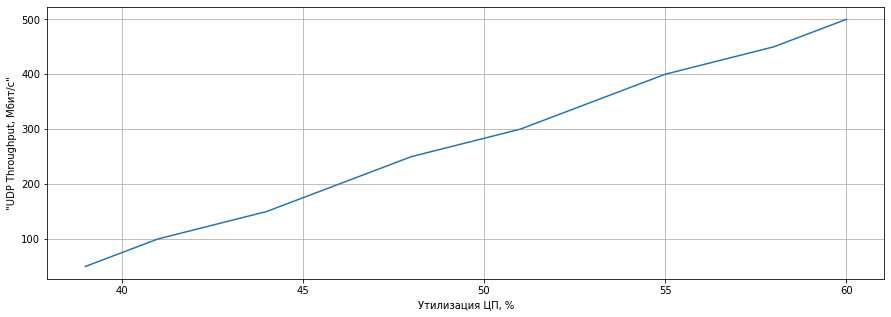

In [22]:
lin = np.around(reg2.predict(prd2_sc),decimals=0)

plt.figure(figsize=(15,5))
plt.plot(lin[:,0], df_2["UDP Throughput, Мбит/с"]);
plt.xlabel('Утилизация ЦП, %');
plt.ylabel('"UDP Throughput, Мбит/с"')
plt.grid()

plt.show();

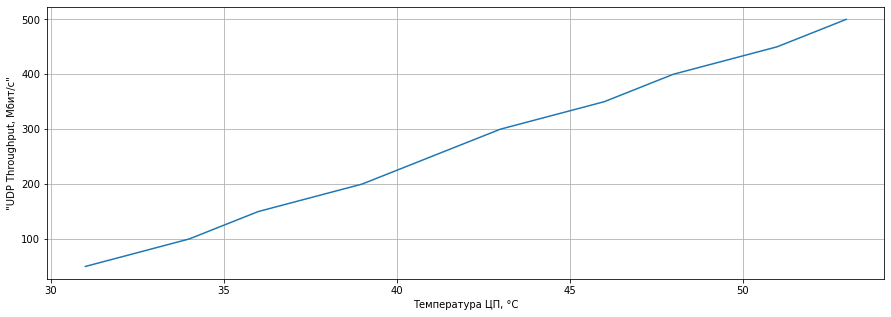

In [23]:
plt.figure(figsize=(15,5))
plt.plot(lin[:,1], df_2["UDP Throughput, Мбит/с"]);
plt.xlabel('Температура ЦП, °С');
plt.ylabel('"UDP Throughput, Мбит/с"')
plt.grid()

plt.show();

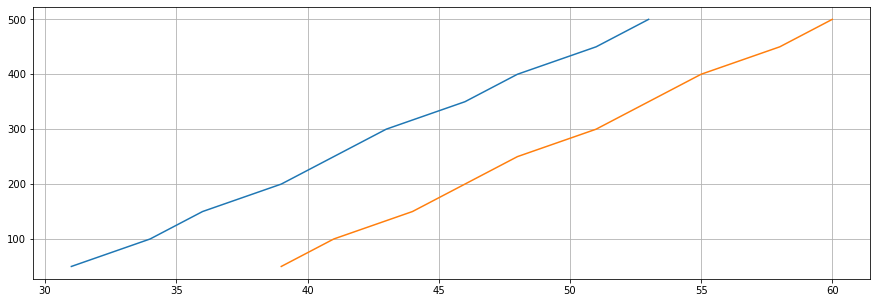

In [24]:

fig, ax = plt.subplots(figsize=(15,5)) 
ax.plot(lin[:,1], df_2["UDP Throughput, Мбит/с"]) 
ax.plot(lin[:,0], df_2["UDP Throughput, Мбит/с"]) 
plt.grid()
plt.show() 